To predict the likelihood of an individual developing heart disease based on various risk factors such as age, gender, blood pressure, cholesterol levels, smoking history, and other relevant medical information.

# Dataset preparation

In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv('/content/heart (1).csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


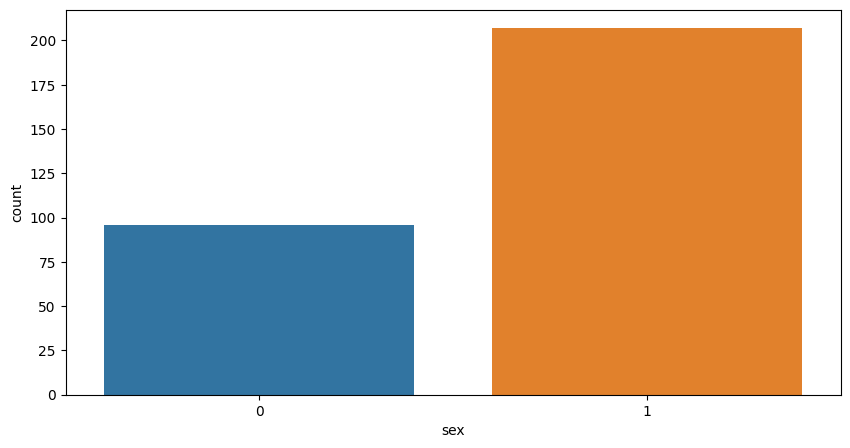

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=df);

Obsevation:

0 defines as females and 1 as males

<Figure size 1000x1000 with 0 Axes>

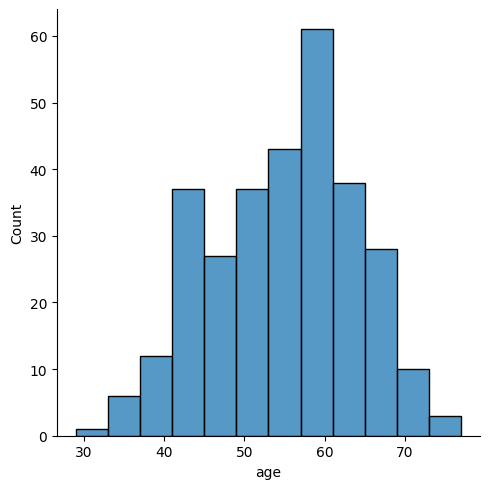

In [8]:
plt.figure(figsize=(10, 10));
sns.displot(df['age']);

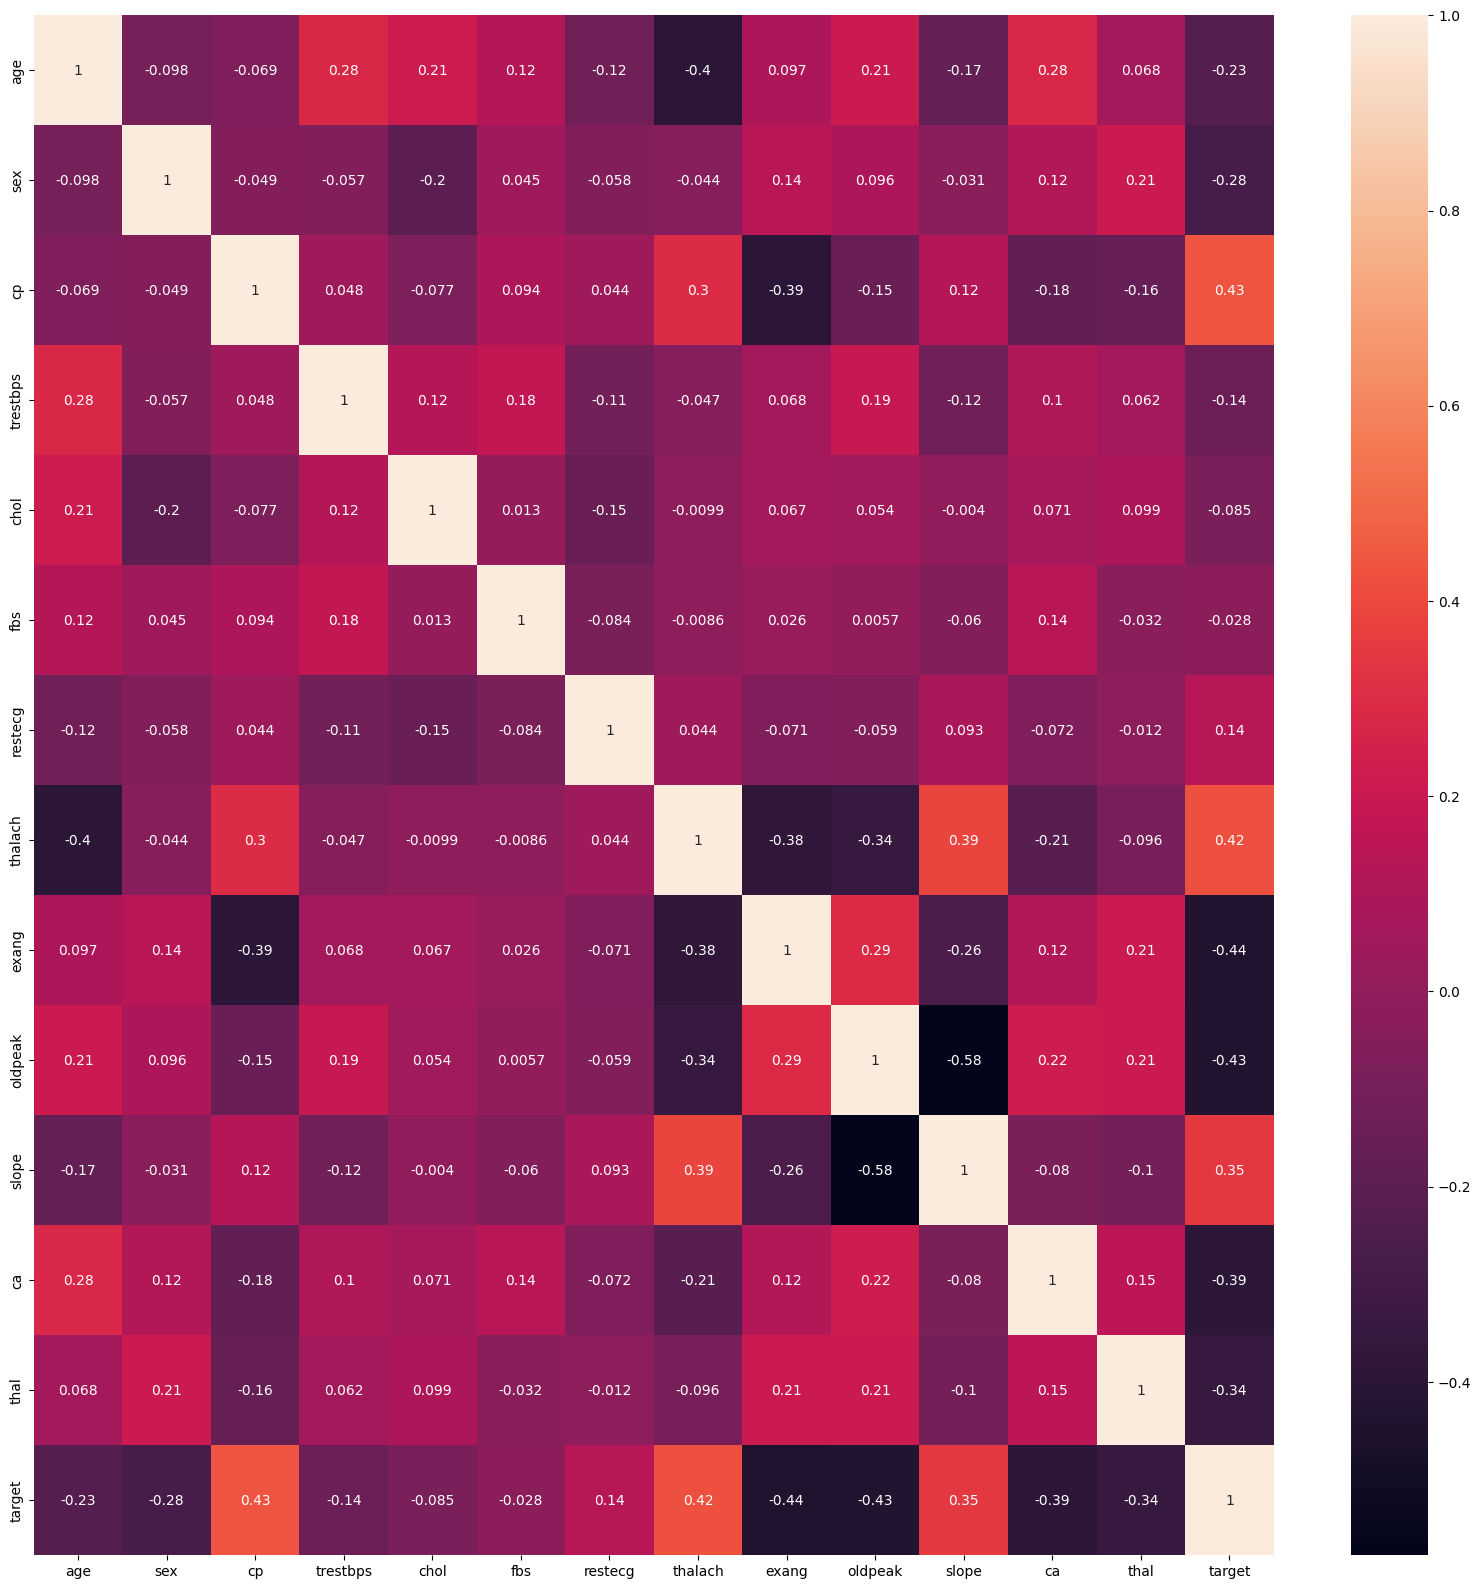

In [9]:
## correlation of features

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True);

<Figure size 1000x1000 with 0 Axes>

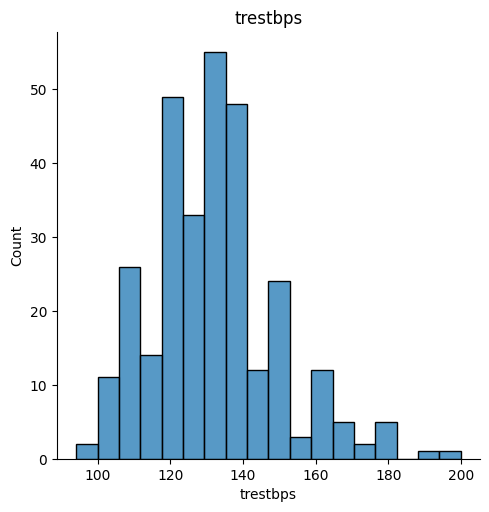

<Figure size 1000x1000 with 0 Axes>

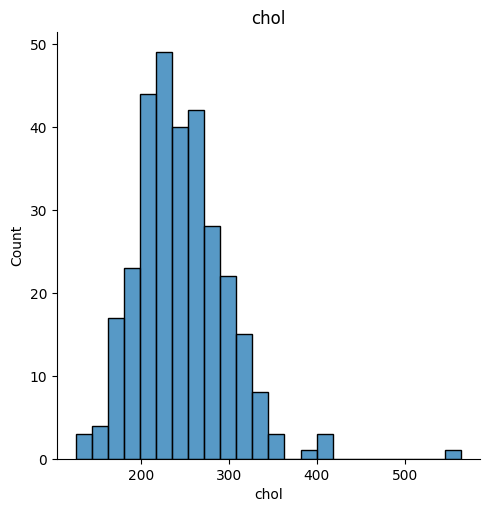

<Figure size 1000x1000 with 0 Axes>

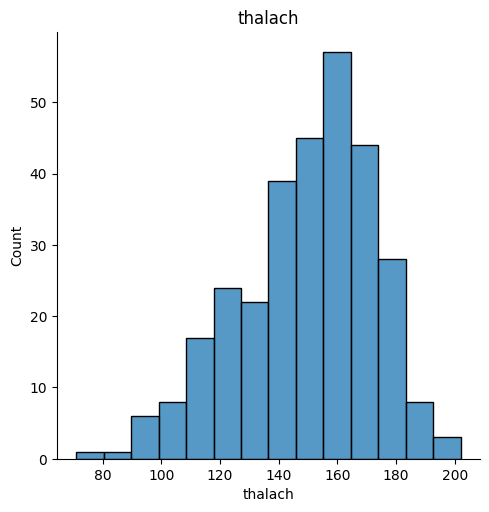

In [10]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.displot(df[f])
    plt.title(f)

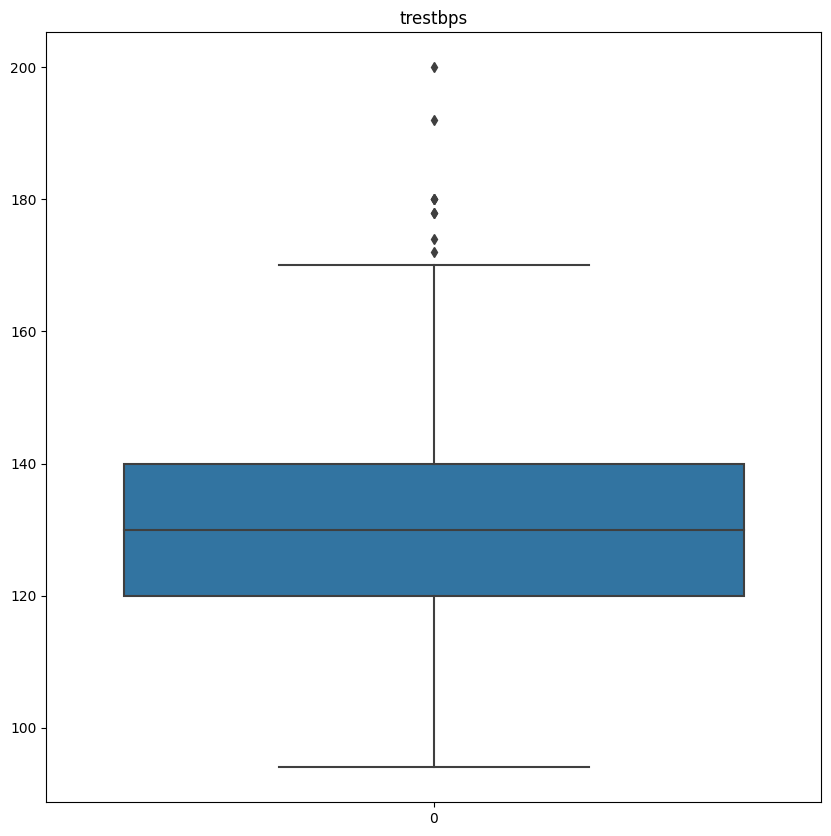

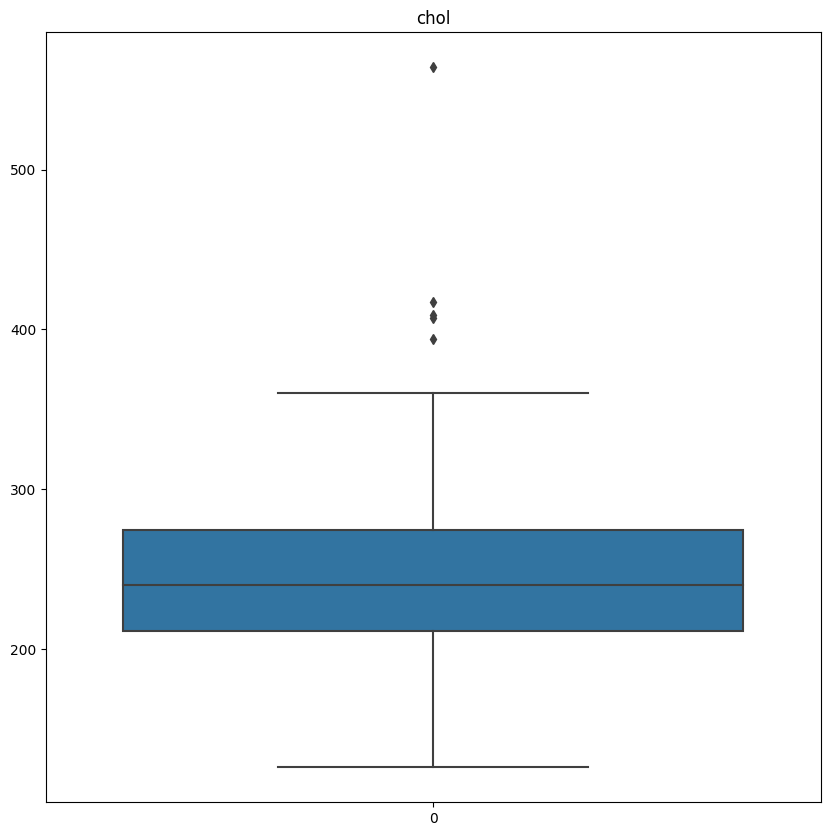

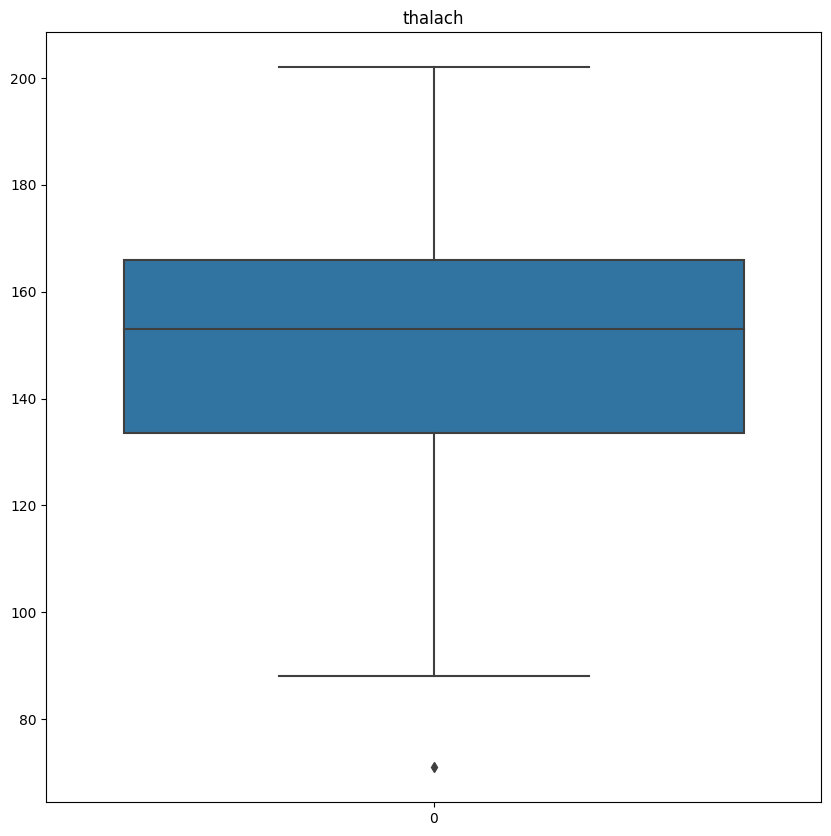

In [11]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

In [12]:
## most of the columns are following gaussian distribution, so we are going to remove outliers with 3rd std

def remove_outliers(df, feature):
    lower_bound = df[feature].mean() - (3 * df[feature].std())
    upper_bound = df[feature].mean() + (3 * df[feature].std())
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [13]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    remove_outliers(df, f)

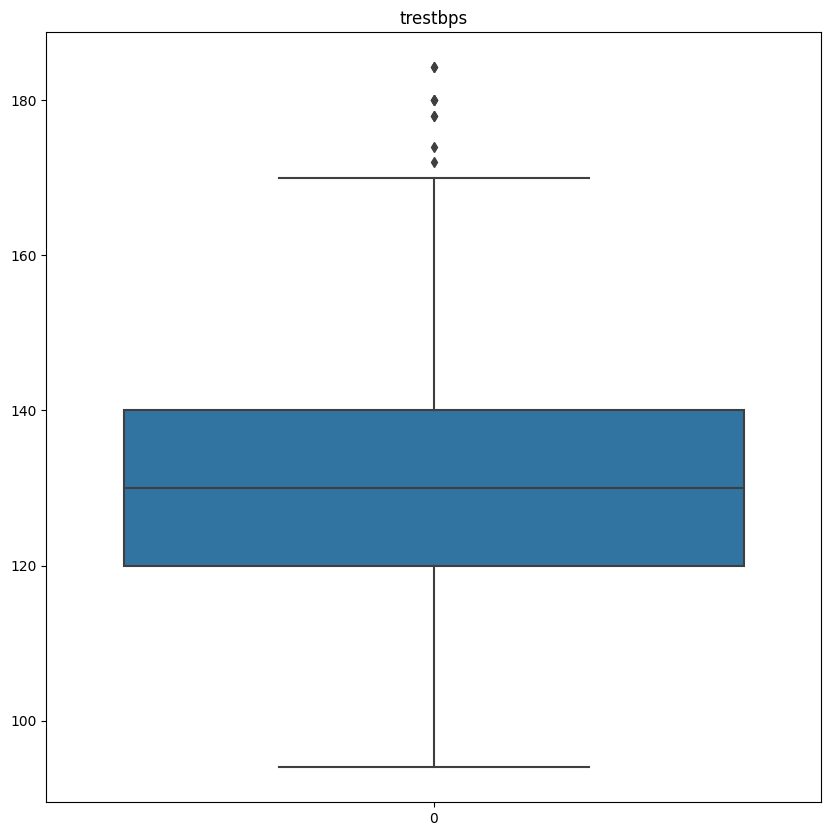

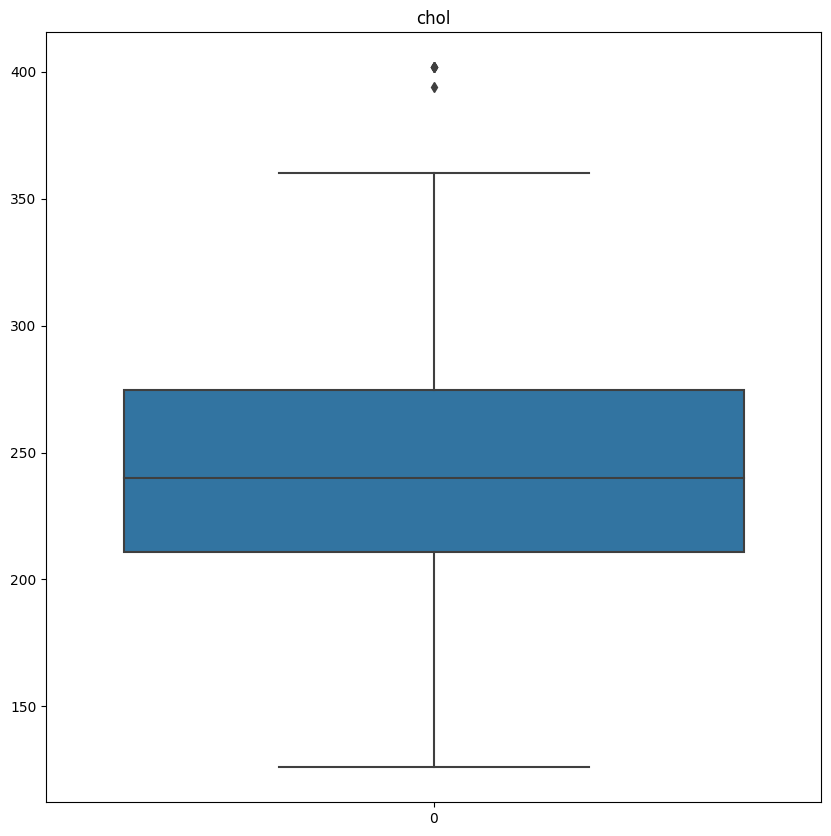

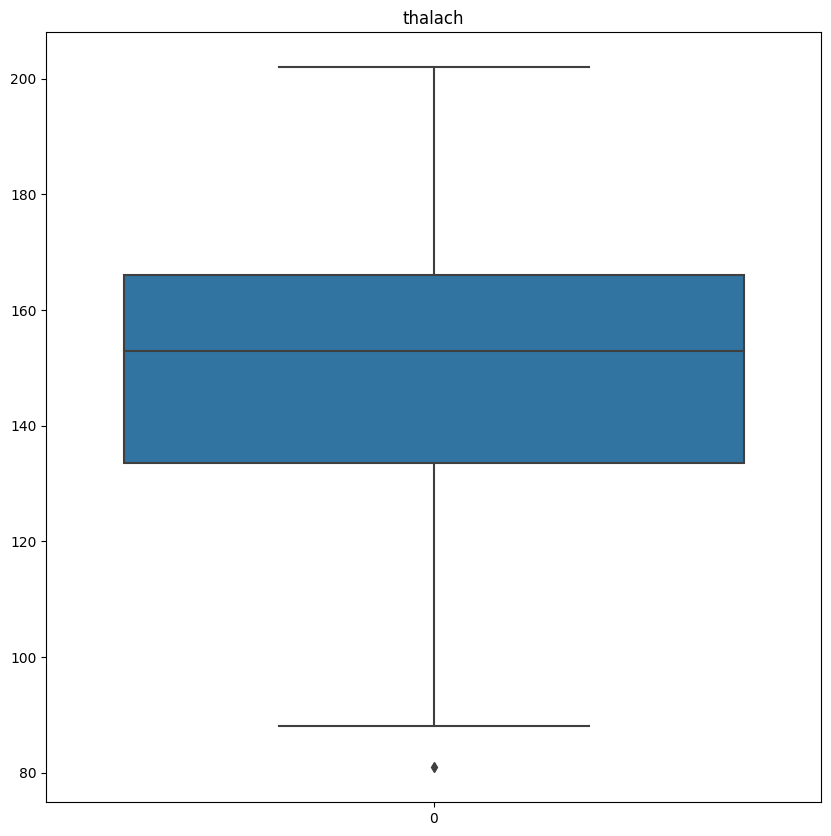

In [14]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

In [15]:
remove_outliers(df, 'age')

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = X.values
y = y.values

# Classification

**Using ML models to get the output**

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**LogisticRegression Classifier model**

In [19]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [23]:
lg.fit(X_train, y_train)

LogisticRegression()

In [21]:
preds = lg.predict(X_test)
pd.DataFrame({'Acutual': y_test, 'Predicted': preds})

,Acutual,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
71,1,1
72,0,1
73,1,1
74,0,0


------------------------------------------------Accuracy Score-------------------------------------------------------
0.8421052631578947
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


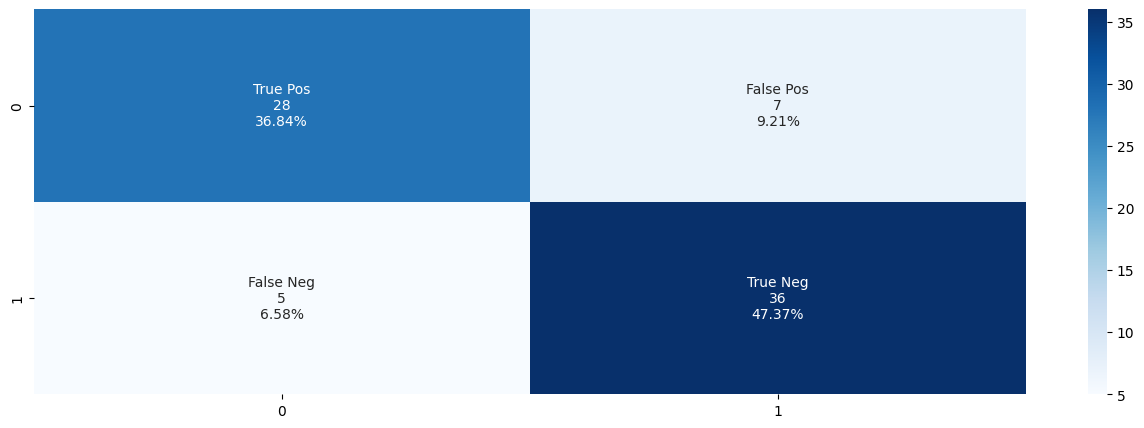

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, preds))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, preds))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,preds)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');